![BTS](img/Logo-BTS.jpg)

# Session 18: Time Series Analysis (I)

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-12-11)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/18-Time-Series-Analysis-I.ipynb)

## Exercise 1: Seasonal decomposition (a)

1. Read `data/gas_demand.csv` into pandas, parsing the dates and indexing properly
2. Plot the demand (`GAS_DEMANDA`) in one axes, and the minimum and maximum temperature (`TEMPERATURA_MINIMA` and `TEMPERATURA_MAXIMA`) in an axes below
3. Check whether the demand is _stationary_ using the Augmented Dickey-Fuller test from statsmodels (_Note: Remember to set a significance level first!_)
4. Compute the **trend** of the demand in three different ways:
  * centered 30 day rolling mean,
  * linear regression,
  * subtracting the previous value for each day
5. Compute the three detrended series, and check whether all of them are stationary

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()

In [2]:
df = pd.read_csv("data/gas_demand.csv", parse_dates=["FECHA"], index_col="FECHA")
df.head()

,TEMPERATURA_MAXIMA,TEMPERATURA_MINIMA,DEMANDA_GAS
FECHA,,,
1996-07-01,28.1,19.0,4114
1996-07-02,26.7,21.0,4538
1996-07-03,27.9,20.0,4481
1996-07-04,29.0,20.4,4432
1996-07-05,36.7,20.4,4395


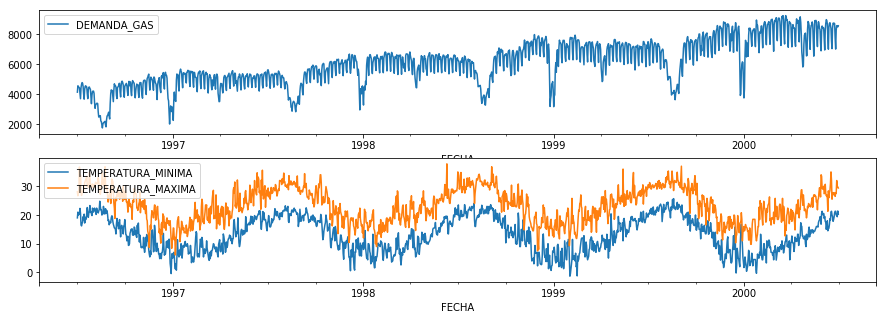

In [3]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 5))

df["DEMANDA_GAS"].plot(ax=axes[0])
axes[0].legend(loc=2)
df[["TEMPERATURA_MINIMA", "TEMPERATURA_MAXIMA"]].plot(ax=axes[1])
axes[1].legend(loc=2);

In [4]:
df.index.weekday

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
            ...
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
           dtype='int64', name='FECHA', length=1461)

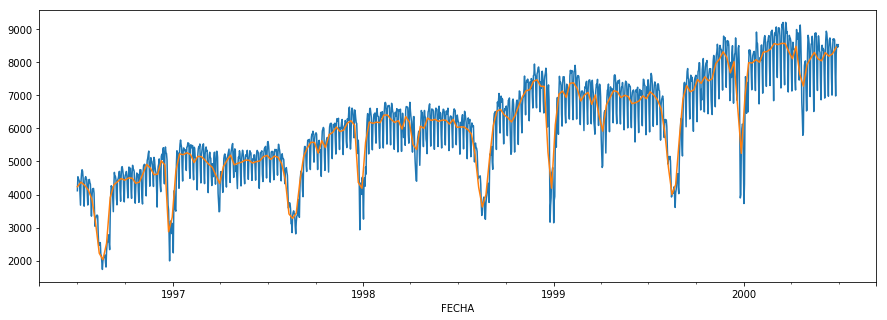

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

df["DEMANDA_GAS"].plot(ax=ax)
df.resample("W")["DEMANDA_GAS"].mean().plot(ax=ax)

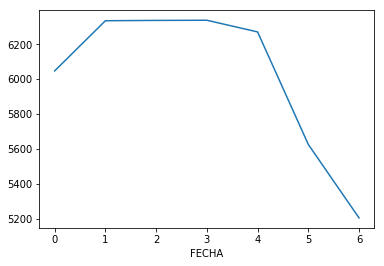

In [6]:
df.groupby(df.index.weekday)["DEMANDA_GAS"].mean().plot()

In [7]:
df.head()

,TEMPERATURA_MAXIMA,TEMPERATURA_MINIMA,DEMANDA_GAS
FECHA,,,
1996-07-01,28.1,19.0,4114
1996-07-02,26.7,21.0,4538
1996-07-03,27.9,20.0,4481
1996-07-04,29.0,20.4,4432
1996-07-05,36.7,20.4,4395


In [11]:
pd.__version__

'0.23.4'

In [12]:
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

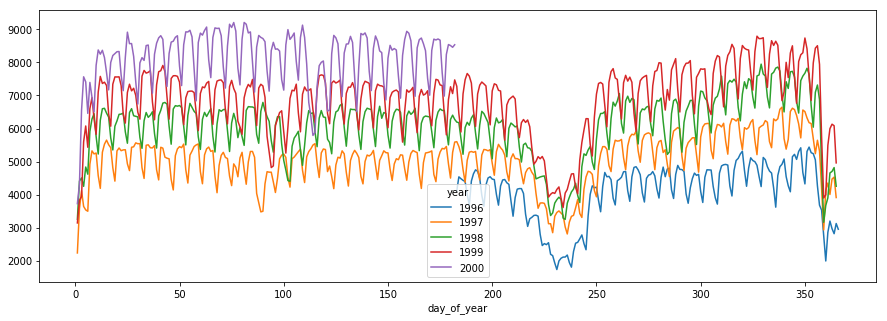

In [14]:
df.pivot_table(
    index="day_of_year", columns="year",
    values="DEMANDA_GAS"
).plot(figsize=(15, 5));

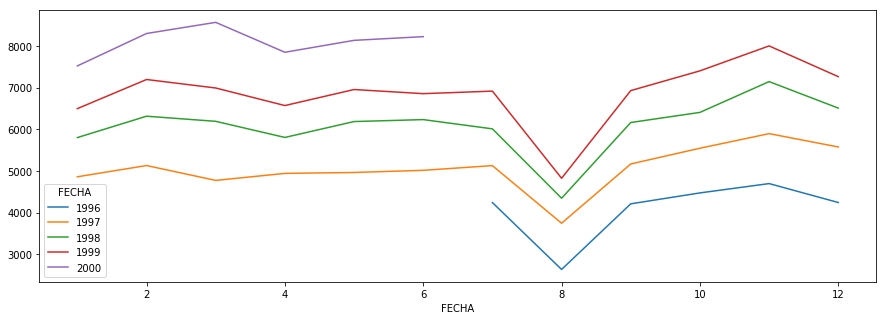

In [10]:
df.pivot_table(
    index=df.index.month, columns=df.index.year,
    values="DEMANDA_GAS"
).plot(figsize=(15, 5));

In [16]:
from statsmodels.tsa.stattools import adfuller

We are performing our test with $\alpha = 0.05$

In [18]:
adfuller(df["DEMANDA_GAS"])

(-2.7655114058923482,
 0.06337159345579783,
 21,
 1439,
 {'1%': -3.4349024693573584,
  '5%': -2.8635506057382325,
  '10%': -2.5678404322793846},
 20328.255689468606)

In [21]:
import statsmodels.api as sm

In [24]:
df.head()

,TEMPERATURA_MAXIMA,TEMPERATURA_MINIMA,DEMANDA_GAS,year,day_of_year
FECHA,,,,,
1996-07-01,28.1,19.0,4114,1996,183
1996-07-02,26.7,21.0,4538,1996,184
1996-07-03,27.9,20.0,4481,1996,185
1996-07-04,29.0,20.4,4432,1996,186
1996-07-05,36.7,20.4,4395,1996,187


In [27]:
import numpy as np

In [30]:
X = np.arange(len(df))
X

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [47]:
sm.add_constant(X)

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 1.458e+03],
       [1.000e+00, 1.459e+03],
       [1.000e+00, 1.460e+03]])

In [42]:
model = sm.OLS(df["DEMANDA_GAS"], sm.add_constant(X))
results = model.fit()

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEMANDA_GAS   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2516.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          7.47e-320
Time:                        11:36:41   Log-Likelihood:                -12025.
No. Observations:                1461   AIC:                         2.405e+04
Df Residuals:                    1459   BIC:                         2.407e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3957.5071     47.551     83.227      0.000    3864.232    4050.783
x1             2.8291      0.056     50.161      0.000       2.719       2.940
==============================================================================
Omnibus:                      330.485   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.993
Skew:                          -1.339   Prob(JB):                    2.38e-140
Kurtosis:                       4.842   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
m = results.params['x1']
y0 = results.params['const']

In [54]:
y0 + m * X

array([3957.50710072, 3960.33624957, 3963.16539842, ..., 8082.40612793,
       8085.23527678, 8088.06442564])

In [55]:
results.predict(sm.add_constant(X))

array([3957.50710072, 3960.33624957, 3963.16539842, ..., 8082.40612793,
       8085.23527678, 8088.06442564])

In [45]:
regr = pd.Series(results.predict(sm.add_constant(X)), index=df.index)

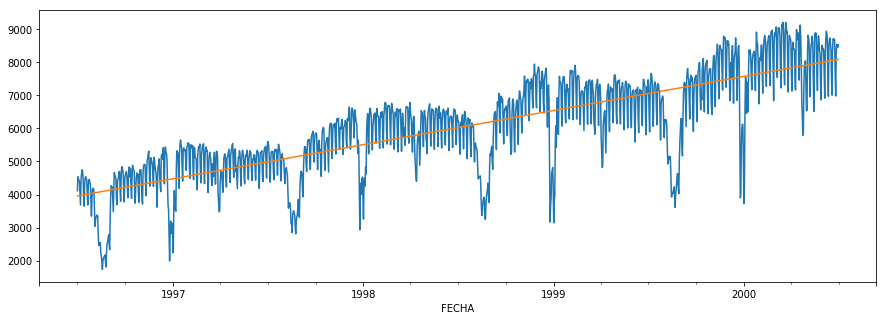

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))

df["DEMANDA_GAS"].plot(ax=ax)
regr.plot(ax=ax)

In [56]:
detrend_ols = df["DEMANDA_GAS"] - regr

In [58]:
adfuller(detrend_ols)

(-6.238774265957301,
 4.753489789162295e-08,
 21,
 1439,
 {'1%': -3.4349024693573584,
  '5%': -2.8635506057382325,
  '10%': -2.5678404322793846},
 20297.231326123285)

In [59]:
detrend_roll = (
    df["DEMANDA_GAS"] -
    df["DEMANDA_GAS"].rolling(30, center=True).mean()
)

In [63]:
adfuller(detrend_roll.dropna())

(-11.885388469533739,
 6.040590643357483e-22,
 23,
 1408,
 {'1%': -3.435002884902567,
  '5%': -2.8635949199569324,
  '10%': -2.56786403055995},
 19705.39140284068)

In [96]:
#df["DEMANDA_GAS"] - df["DEMANDA_GAS"].shift(1)
detrend_diff = df["DEMANDA_GAS"].diff()
#"trend" = df["DEMANDA_GAS"] - detrend_diff

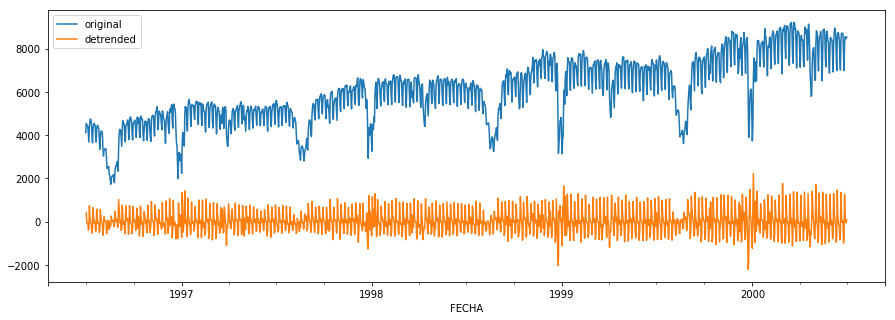

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))

df["DEMANDA_GAS"].plot(ax=ax, label="original")
#trend.plot(ax=ax, label="trend")
detrend_diff.plot(ax=ax, label="detrended");
ax.legend();

In [98]:
adfuller(detrend_diff.dropna())

(-9.240073309128928,
 1.5913439965263514e-15,
 24,
 1435,
 {'1%': -3.4349151819757466,
  '5%': -2.863556216004778,
  '10%': -2.5678434198545568},
 20320.54486596078)

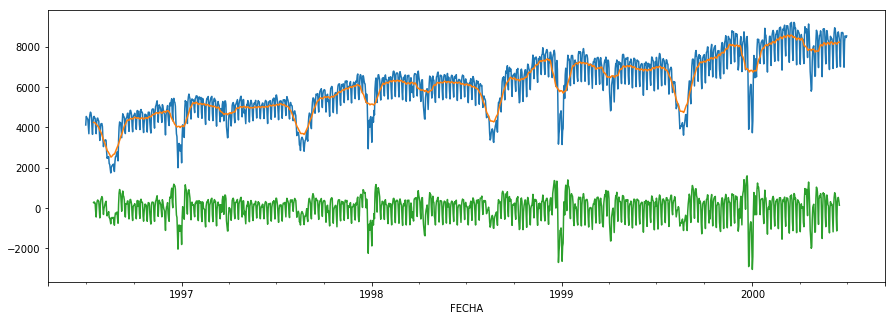

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))

df["DEMANDA_GAS"].plot(ax=ax)
df["DEMANDA_GAS"].rolling(30, center=True).mean().plot(ax=ax)
detrend_roll.plot(ax=ax);

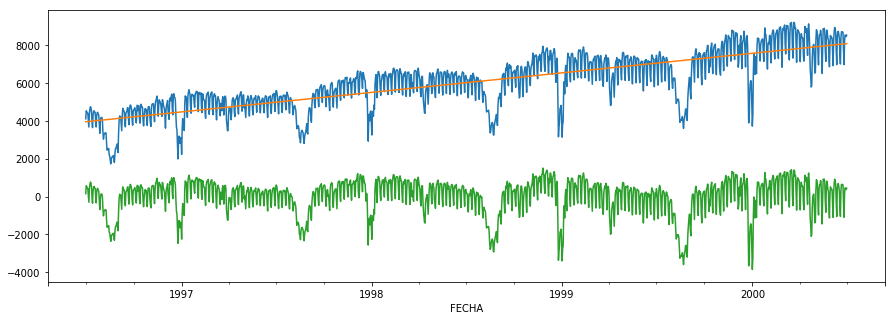

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))

df["DEMANDA_GAS"].plot(ax=ax)
regr.plot(ax=ax)
detrend_ols.plot(ax=ax)

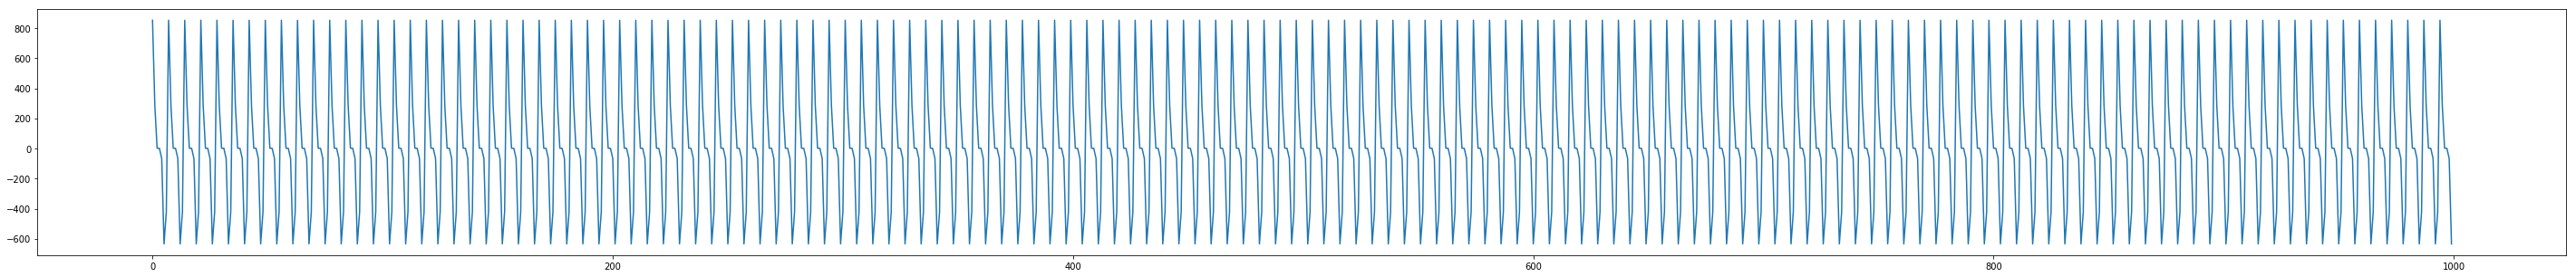

In [136]:
plt.figure(figsize=(50, 5))
plt.plot(np.tile(typical_week, len(df) // 7 + 1)[:1000])

In [137]:
seasonal = pd.Series(
    np.tile(typical_week, len(df) // 7 + 1)[:len(detrend_diff)],
    index=detrend_diff.index
)

In [143]:
noise = detrend_diff - seasonal

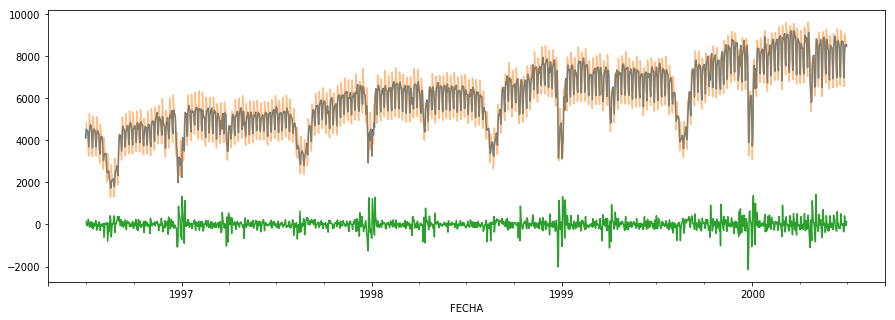

In [144]:
fig, ax = plt.subplots(figsize=(15, 5))

df["DEMANDA_GAS"].plot(ax=ax)

#detrend_diff.plot(ax=ax)
#seasonal.plot(ax=ax)

(detrend_diff + seasonal + df["DEMANDA_GAS"].shift(1)).plot(ax=ax, alpha=0.5)

noise.plot(ax=ax)

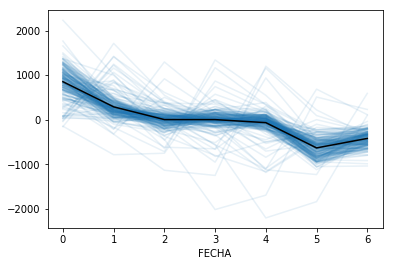

In [118]:
fig, ax = plt.subplots()

detrend_diff.to_frame().pivot_table(
    columns=np.arange(len(df)) // 7,
    index=df.index.dayofweek,
    values="DEMANDA_GAS"
).plot(color='C0', alpha=0.1, ax=ax, legend=False)

typical_week = detrend_diff.groupby(
    detrend_diff.index.dayofweek
).mean()
typical_week.plot(color='k', ax=ax);

## Exercise 2: Seasonal decomposition (b)

6. Compute the mean of each weekday using the detrended series
7. Compute the _weekly_ **seasonal** component by stiching the previous result as many times as necessary to achieve the length of the original series
8. Compute the **residuals** by subtracting the **trend** and the **seasonal** component from the original series. Which method for the trend gives the residuals with the smaller standard deviation?
9. Plot in the same figure the original series, the trend, the detrended one, the seasonal component and the residuals
10. Compare your results with the output of `statsmodels.tsa.seasonal.seasonal_decompose`.

## Exercise 3: Heteroskedasticity

1. Load the `data/air_passengers.csv` dataset, parse the dates and index it
2. Fit a linear regression using `statsmodels` (_Note: Use a numeric variable for `X` instead of the index, it might fail because it's a date)
3. Plot the original data and the resulting straight line
4. Perform a heteroskedasticity test using `het_breuschpagan` from `statsmodels`, using the residuals of the model and the `X` variable you used to fit the model
5. Perform a Box-Cox transformation _using SciPy_ and repeat the linear regression and the heteroskedasticity test. Is the series homokedastic now?